# Текущие задачи

* Кластеризовать мемы 
* Кластеризовать юзеров
* Сопоставить юзерам мемы (кластеры)

## Импорт библиотек и датасэтов

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = 'drive/MyDrive/DS/meme'

In [4]:
event = pd.read_csv(path+'/tgbot_event.csv')
meme = pd.read_csv(path+'/tgbot_meme.csv')
user = pd.read_csv(path+'/tgbot_user.csv')

In [5]:
meme.head()

,meme_id,meme_type,original_post_link,source_name,published_at,telegram_file_id,content_url,caption,content_lang,is_available,likes,dislikes,created_at,updated_at,is_broken,source_id,content_text,caption_lang,language_id
0,13395,photo,https://vk.com/saintbeobanka?w=wall-67185996_2...,https://vk.com/saintbeobanka,2020-03-28 00:22:26+00,AgACAgQAAx0EVqG9GwACyDJefsuwVgIydYSqXSt9L2-o3Y...,https://sun6-14.userapi.com/c7004/v7004381/823...,NaN,ru,True,28,38,2020-03-28 03:59:44.496141+00,2021-02-10 07:21:58.272992+00,False,10.0,Будильник Отложить на 10 мимут vk.com/jaimes_h...,ww,2.0
1,13952,photo,https://reddit.com/r/wholesomememes/comments/f...,https://www.reddit.com/r/wholesomememes/,2020-03-28 12:14:46+00,AgACAgQAAx0EVqG9GwAC0QZef4L5HUrdey1K4xOBNC0V0-...,https://i.redd.it/xo8ilxurnep41.png,Wholesome slavery?,en,True,9,16,2020-03-28 17:01:45.289559+00,2021-02-10 07:21:58.276687+00,False,80.0,Happy Thanksgiving ! I was gonna say Let's say...,en,3.0
2,15593,photo,https://t.me/LaQeque/41396,https://t.me/LaQeque,2020-03-30 09:11:04+00,AgACAgIAAx0CVqG9GwAC7X5egk_f1FcUOOXdwvQ6tCUBOP...,https://storage.googleapis.com/meme_imgs/15593...,NaN,ru,True,41,54,2020-03-30 12:02:40.780487+00,2021-02-10 07:21:58.28043+00,False,19.0,"Ггграждане, мемння ззовут вваш преззидент, ппо...",ww,2.0
3,18442,photo,https://reddit.com/r/dankmemes/comments/ftalgn...,https://www.reddit.com/r/dankmemes/,2020-04-01 22:53:31+00,AgACAgQAAx0EVqG9GwABAQ8_XoVyYdS-2R9bcIpdH4YqK-...,https://i.redd.it/a3mp5spddaq41.jpg,You Won’t last 10 seconds,en,True,87,48,2020-04-02 05:04:33.300689+00,2021-02-10 07:21:58.28401+00,False,78.0,AL ALL WT Should we contact the hot milfs in o...,en,3.0
4,20798,photo,https://vk.com/wtf.rasha?w=wall-23486067_179559,https://vk.com/wtf.rasha,2020-04-04 11:15:01+00,AgACAgQAAx0EVqG9GwABATuvXonKXWZuSeRqN8vd8gVR09...,https://sun9-37.userapi.com/c858228/v858228646...,NaN,ru,True,234,178,2020-04-04 12:10:28.173755+00,2021-02-10 07:21:58.291519+00,False,9.0,Шляпа Патриарха Никона @NikonaShapka апрель 20...,ww,2.0


In [6]:
user.head()

,user_id,username,first_name,last_name,language_code,seed,deep_link,is_blocked_bot,is_banned,is_admin,is_moderator,sessions,last_session_memes,watched_memes,created_at,updated_at,interface_lang,gender,latest_meme_sent_at
0,1235209430,NaN,Paras,Kamboj,NaN,6,likemeupbot_lang_en,True,False,False,0,3,4,8,2020-10-27 07:33:12.040495+00,2021-02-10 00:29:57.669801+00,en,NaN,NaN
1,113584040,nikrnrr,N,NaN,ru,26,NaN,True,False,False,0,1,1,0,2020-10-28 12:05:37.473558+00,2021-02-10 01:29:57.505289+00,ru,N,NaN
2,1142713343,NaN,Serik,NaN,NaN,32,NaN,True,False,False,0,1,1,0,2020-10-27 17:31:30.480084+00,2021-02-10 01:29:55.555919+00,en,NaN,NaN
3,187967374,Ddivanov,Dmitry,Ivanov,ru,13,NaN,True,False,False,0,2,5,9,2020-10-26 13:12:52.373779+00,2021-02-09 23:29:56.086916+00,ru,M,NaN
4,923016092,NaN,Joanna,NaN,es,99,NaN,False,False,False,0,39,1,35,2020-10-27 19:11:33.959974+00,2021-02-09 17:56:04.574689+00,en,NaN,2021-02-09 17:56:04.574558+00


## Обработка датасэтов

В  данной части будем:
* Изучать датасэты (фичи)
* Удалять ненужные/пустые фичи
* Нужные и достаточно полные данные будем, при необходимости, преобразовывать в вид, приемлемый для обучения

### Обработка meme_df

In [7]:
meme.columns

Index(['meme_id', 'meme_type', 'original_post_link', 'source_name',
       'published_at', 'telegram_file_id', 'content_url', 'caption',
       'content_lang', 'is_available', 'likes', 'dislikes', 'created_at',
       'updated_at', 'is_broken', 'source_id', 'content_text', 'caption_lang',
       'language_id'],
      dtype='object')

In [8]:
meme.isna().sum()

meme_id                   0
meme_type                 0
original_post_link     1103
source_name               0
published_at              0
telegram_file_id         29
content_url            8829
caption               53830
content_lang          14256
is_available              0
likes                     0
dislikes                  0
created_at                0
updated_at                0
is_broken                 0
source_id              2401
content_text          21805
caption_lang           4855
language_id            1770
dtype: int64

In [9]:
meme_columns_dropped = ['original_post_link', 'telegram_file_id', 'content_url', 'updated_at', 'is_broken', 'caption', 'caption_lang', 'created_at'] # столбцы в meme_df, которые не нужны для исследования
meme.drop(meme_columns_dropped, axis = 1, inplace= True)


In [10]:
meme.isna().sum()

meme_id             0
meme_type           0
source_name         0
published_at        0
content_lang    14256
is_available        0
likes               0
dislikes            0
source_id        2401
content_text    21805
language_id      1770
dtype: int64

In [11]:
meme.content_lang.value_counts()

en       33503
ru       25724
ww        7533
pt-PT     3543
und       1515
         ...  
yi           2
ur           2
th           1
bs           1
ta           1
Name: content_lang, Length: 93, dtype: int64

In [12]:
# преобразуем content_lang по следующей логике: для RU - 0, EN - 1, иной язык - 2
meme.content_lang.replace({'ru':0, 'en':1}, inplace = True)
meme.loc[(meme['content_lang'] != 0) & (meme['content_lang'] != 1), 'content_lang'] = 2

In [13]:
meme.isna().sum()

meme_id             0
meme_type           0
source_name         0
published_at        0
content_lang        0
is_available        0
likes               0
dislikes            0
source_id        2401
content_text    21805
language_id      1770
dtype: int64

In [14]:
# преобразуем content_text по следующей логике: если есть текст, то ставим 1, если нет - 0
meme['content_text'].fillna(0, inplace = True)
meme.loc[meme['content_text'] != 0, 'content_text'] = 1


In [15]:
meme.language_id.value_counts()

2.0    41728
3.0    36841
4.0     5151
1.0     3173
5.0      256
Name: language_id, dtype: int64

In [16]:
import random
nans = meme['language_id'].isna() # пропорциональное распределение языков по nan значениям
language_ids = meme.language_id.unique()
language_ids = language_ids[np.isnan(language_ids) == False]
length = sum(nans)
replacement = random.choices(language_ids, k=length)
meme.loc[nans,'language_id'] = replacement

In [17]:
meme.language_id.value_counts()

2.0    42095
3.0    37162
4.0     5523
1.0     3536
5.0      603
Name: language_id, dtype: int64

In [18]:
meme.isna().sum()

meme_id            0
meme_type          0
source_name        0
published_at       0
content_lang       0
is_available       0
likes              0
dislikes           0
source_id       2401
content_text       0
language_id        0
dtype: int64

In [19]:
meme['source_id'].fillna(0, inplace = True)

In [20]:
meme.head()

,meme_id,meme_type,source_name,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id
0,13395,photo,https://vk.com/saintbeobanka,2020-03-28 00:22:26+00,0,True,28,38,10.0,1,2.0
1,13952,photo,https://www.reddit.com/r/wholesomememes/,2020-03-28 12:14:46+00,1,True,9,16,80.0,1,3.0
2,15593,photo,https://t.me/LaQeque,2020-03-30 09:11:04+00,0,True,41,54,19.0,1,2.0
3,18442,photo,https://www.reddit.com/r/dankmemes/,2020-04-01 22:53:31+00,1,True,87,48,78.0,1,3.0
4,20798,photo,https://vk.com/wtf.rasha,2020-04-04 11:15:01+00,0,True,234,178,9.0,1,2.0


In [21]:
meme = pd.get_dummies(meme, columns = ['meme_type'])

In [22]:
meme

,meme_id,source_name,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video
0,13395,https://vk.com/saintbeobanka,2020-03-28 00:22:26+00,0,True,28,38,10.0,1,2.0,0,1,0
1,13952,https://www.reddit.com/r/wholesomememes/,2020-03-28 12:14:46+00,1,True,9,16,80.0,1,3.0,0,1,0
2,15593,https://t.me/LaQeque,2020-03-30 09:11:04+00,0,True,41,54,19.0,1,2.0,0,1,0
3,18442,https://www.reddit.com/r/dankmemes/,2020-04-01 22:53:31+00,1,True,87,48,78.0,1,3.0,0,1,0
4,20798,https://vk.com/wtf.rasha,2020-04-04 11:15:01+00,0,True,234,178,9.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88914,50179,https://vk.com/socialburr,2020-07-12 12:14:20+00,0,True,662,624,46.0,1,2.0,0,1,0
88915,61616,https://t.me/leninstreet,2020-09-30 16:00:06+00,0,True,133,150,29.0,1,2.0,0,1,0
88916,22283,https://vk.com/eternalclassic,2020-04-05 16:40:00+00,1,False,5,11,4.0,1,3.0,0,1,0
88917,80056,https://t.me/low_content,2020-12-31 05:03:01+00,2,True,35,54,147.0,0,2.0,0,1,0


In [23]:
meme.source_name.str[8:13].value_counts()

t.me/    30063
vk.co    28664
www.r    20609
insta     9325
            89
         ...  
ov           1
le_D         1
aRavi        1
Р И Щ        1
hacat        1
Name: source_name, Length: 77, dtype: int64

In [24]:
# преобразование source_name. vk - 0, telegram - 1, reddit - 2, inst - 3, иной источник - 4.
meme['source_grouped'] = meme.source_name.str[8:13]
meme.source_grouped.replace({'vk.co':0, 't.me/':1, 'www.r':2, 'insta':3}, inplace = True)
meme.loc[(meme['source_grouped'] != 0) & (meme['source_grouped'] != 1) & (meme['source_grouped'] != 2) & (meme['source_grouped'] != 3), 'source_grouped'] = 4
meme.drop('source_name', axis = 1, inplace = True)
meme

,meme_id,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped
0,13395,2020-03-28 00:22:26+00,0,True,28,38,10.0,1,2.0,0,1,0,0
1,13952,2020-03-28 12:14:46+00,1,True,9,16,80.0,1,3.0,0,1,0,2
2,15593,2020-03-30 09:11:04+00,0,True,41,54,19.0,1,2.0,0,1,0,1
3,18442,2020-04-01 22:53:31+00,1,True,87,48,78.0,1,3.0,0,1,0,2
4,20798,2020-04-04 11:15:01+00,0,True,234,178,9.0,1,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88914,50179,2020-07-12 12:14:20+00,0,True,662,624,46.0,1,2.0,0,1,0,0
88915,61616,2020-09-30 16:00:06+00,0,True,133,150,29.0,1,2.0,0,1,0,1
88916,22283,2020-04-05 16:40:00+00,1,False,5,11,4.0,1,3.0,0,1,0,0
88917,80056,2020-12-31 05:03:01+00,2,True,35,54,147.0,0,2.0,0,1,0,1


In [25]:
meme['is_available'] = meme['is_available'].astype(int)
meme

,meme_id,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped
0,13395,2020-03-28 00:22:26+00,0,1,28,38,10.0,1,2.0,0,1,0,0
1,13952,2020-03-28 12:14:46+00,1,1,9,16,80.0,1,3.0,0,1,0,2
2,15593,2020-03-30 09:11:04+00,0,1,41,54,19.0,1,2.0,0,1,0,1
3,18442,2020-04-01 22:53:31+00,1,1,87,48,78.0,1,3.0,0,1,0,2
4,20798,2020-04-04 11:15:01+00,0,1,234,178,9.0,1,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88914,50179,2020-07-12 12:14:20+00,0,1,662,624,46.0,1,2.0,0,1,0,0
88915,61616,2020-09-30 16:00:06+00,0,1,133,150,29.0,1,2.0,0,1,0,1
88916,22283,2020-04-05 16:40:00+00,1,0,5,11,4.0,1,3.0,0,1,0,0
88917,80056,2020-12-31 05:03:01+00,2,1,35,54,147.0,0,2.0,0,1,0,1


In [26]:
meme['published_at'] = meme['published_at'].str[0:4].astype(int) # Вытащим из даты только год
meme['published_at'].value_counts()

2020    76791
2021    12064
2019       51
2018        7
2017        4
2016        1
2014        1
Name: published_at, dtype: int64

In [27]:
#преобразуем published_at по логике: если мем опубликован в 2021 году - 1, в ином случае - 0
meme.published_at.replace({2021:1}, inplace = True)
meme.loc[meme['published_at'] != 1, 'published_at'] = 0
meme['published_at'].value_counts()
meme.rename(columns = {'published_at' : 'published_at2021'}, inplace = True)

In [28]:
meme.set_index('meme_id', inplace = True)

In [29]:
meme.head()

,published_at2021,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped
meme_id,,,,,,,,,,,,
13395,0,0,1,28,38,10.0,1,2.0,0,1,0,0
13952,0,1,1,9,16,80.0,1,3.0,0,1,0,2
15593,0,0,1,41,54,19.0,1,2.0,0,1,0,1
18442,0,1,1,87,48,78.0,1,3.0,0,1,0,2
20798,0,0,1,234,178,9.0,1,2.0,0,1,0,0


### Обработка user_df

In [31]:
user.head()

,user_id,username,first_name,last_name,language_code,seed,deep_link,is_blocked_bot,is_banned,is_admin,is_moderator,sessions,last_session_memes,watched_memes,created_at,updated_at,interface_lang,gender,latest_meme_sent_at
0,1235209430,NaN,Paras,Kamboj,NaN,6,likemeupbot_lang_en,True,False,False,0,3,4,8,2020-10-27 07:33:12.040495+00,2021-02-10 00:29:57.669801+00,en,NaN,NaN
1,113584040,nikrnrr,N,NaN,ru,26,NaN,True,False,False,0,1,1,0,2020-10-28 12:05:37.473558+00,2021-02-10 01:29:57.505289+00,ru,N,NaN
2,1142713343,NaN,Serik,NaN,NaN,32,NaN,True,False,False,0,1,1,0,2020-10-27 17:31:30.480084+00,2021-02-10 01:29:55.555919+00,en,NaN,NaN
3,187967374,Ddivanov,Dmitry,Ivanov,ru,13,NaN,True,False,False,0,2,5,9,2020-10-26 13:12:52.373779+00,2021-02-09 23:29:56.086916+00,ru,M,NaN
4,923016092,NaN,Joanna,NaN,es,99,NaN,False,False,False,0,39,1,35,2020-10-27 19:11:33.959974+00,2021-02-09 17:56:04.574689+00,en,NaN,2021-02-09 17:56:04.574558+00


In [33]:
user.isna().sum()

user_id                    0
username                7785
first_name                 2
last_name              13458
language_code           6897
seed                       0
deep_link               8534
is_blocked_bot             0
is_banned                  0
is_admin                   0
is_moderator               0
sessions                   0
last_session_memes         0
watched_memes              0
created_at                 0
updated_at                 0
interface_lang           155
gender                 21968
latest_meme_sent_at    11958
dtype: int64

In [34]:
#!pip install gender_guesser !pip install pytrovich # попытка использовать данные библиотеки для сохранения поля gender

In [35]:
user.drop(['username', 'first_name', 'last_name', 'language_code', 'seed', 'deep_link', 'is_blocked_bot', 'is_admin', 'is_moderator', 'created_at', 'updated_at', 'gender', 'latest_meme_sent_at', 'is_banned'], axis = 1, inplace = True) # удаляем ненужные/неполные столбцы

In [36]:
user.interface_lang.value_counts()

ru    17662
en     9884
in      262
uk       34
pt       22
Name: interface_lang, dtype: int64

In [37]:
user.interface_lang.replace({'en':1, 'ru':0}, inplace = True) # 1 если интерфейс английский, 0 если русский, 2 если иной
user.loc[(user['interface_lang'] != 0) & (user['interface_lang'] != 1), 'interface_lang'] = 2

In [38]:
# Конечно, 155 nan по interface_lang можно было запихнуть в любую категорию, т.к. малое число пропусков, но захотел распределить пропорционально по двум бОльшим категориям
import random
nans = user['interface_lang'].isna()
length = sum(nans)
replacement = random.choices([0, 1], weights=[.75, .25], k=length)
user.loc[nans,'interface_lang'] = replacement
user.isna().sum()

user_id               0
sessions              0
last_session_memes    0
watched_memes         0
interface_lang        0
dtype: int64

In [39]:
user.set_index('user_id', inplace = True)

In [40]:
user.head()

,sessions,last_session_memes,watched_memes,interface_lang
user_id,,,,
1235209430,3,4,8,1
113584040,1,1,0,0
1142713343,1,1,0,1
187967374,2,5,9,0
923016092,39,1,35,1


### Обработка event_df

In [79]:
event.head()

,event_id,reaction_id,session_idx,meme_idx,created_at,reacted_at,meme_id,user_id,telegram_message_id
0,1569409,1.0,1.0,171.0,2020-09-23 14:45:40.204598+00,2020-09-23 14:45:44.079206+00,9197,1153946021,1624299.0
1,1569228,2.0,199.0,189.0,2020-09-23 14:38:56.25774+00,2020-09-23 14:39:11.978709+00,34459,285739883,1624096.0
2,1569405,1.0,7.0,133.0,2020-09-23 14:45:34.244269+00,2020-09-23 14:45:46.699976+00,10879,751332478,1624295.0
3,1569239,1.0,2.0,265.0,2020-09-23 14:39:17.175786+00,2020-09-23 14:39:28.054075+00,46731,914220296,1624113.0
4,1569254,1.0,2.0,130.0,2020-09-23 14:39:57.24919+00,2020-09-23 14:39:58.963727+00,49571,1171473137,1624129.0


In [80]:
event.reaction_id.unique()

array([ 1.,  2.,  5., nan,  4.,  3.])

In [81]:
event = event.drop(event[(event.reaction_id == 3) | (event.reaction_id == 4) |(event.reaction_id == 5) ].index) # Удаление действий админов
event.drop(['telegram_message_id', 'session_idx', 'meme_idx', 'created_at', 'reacted_at'], axis = 1, inplace = True)

In [82]:
event.isna().sum()

event_id            0
reaction_id    631914
meme_id             0
user_id             0
dtype: int64

In [84]:
event.reaction_id.value_counts()

1.0    4645144
2.0    4538667
Name: reaction_id, dtype: int64

In [86]:
nans = event['reaction_id'].isna()  # пропорциональное распределение лайков/дизлайков по nan значениям
length = sum(nans)
replacement = random.choices([1, 2], weights=[.5, .5], k=length)
event.loc[nans,'reaction_id'] = replacement
event.isna().sum()

event_id       0
reaction_id    0
meme_id        0
user_id        0
dtype: int64

In [87]:
event.head()

,event_id,reaction_id,meme_id,user_id
0,1569409,1.0,9197,1153946021
1,1569228,2.0,34459,285739883
2,1569405,1.0,10879,751332478
3,1569239,1.0,46731,914220296
4,1569254,1.0,49571,1171473137


## Кластеризация датасэтов

В данной части будет рассчитано оптимальное количество кластеров для наших датасэтов различными способами, а именно:
* Методом локтя
* Методом силуэта
* С помощью Индекс Дэвиса – Боулдина

По каждому из методов выполнено обучение по датасэту, а также отражены графики для наглядности

### Кластеризация meme_df

In [41]:
from sklearn.preprocessing import MinMaxScaler


In [42]:
X=meme.copy()


In [43]:
scaler = MinMaxScaler()

In [44]:
X_scaled=scaler.fit_transform(X)

In [45]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.cluster import KMeans


In [46]:
# Для каждого из значений кол-ва кластеров от 2 до 12 фиксируем результат по каждому из методов для дальнейшего отражения результатов на графике.
km_scores= []
km_silhouette = []
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

Score for number of cluster(s) 2: -54480.68126754742
Silhouette score for number of cluster(s) 2: 0.4532038276362255
Davies Bouldin score for number of cluster(s) 2: 1.2467085379097889
Score for number of cluster(s) 3: -45889.466152878216
Silhouette score for number of cluster(s) 3: 0.43911697899939467
Davies Bouldin score for number of cluster(s) 3: 1.2596618128213315
Score for number of cluster(s) 4: -37702.578039795684
Silhouette score for number of cluster(s) 4: 0.43029319251653503
Davies Bouldin score for number of cluster(s) 4: 1.171857539358558
Score for number of cluster(s) 5: -31498.848809358184
Silhouette score for number of cluster(s) 5: 0.3725801970396311
Davies Bouldin score for number of cluster(s) 5: 1.175382335235994
Score for number of cluster(s) 6: -26859.075388989364
Silhouette score for number of cluster(s) 6: 0.40374467552826004
Davies Bouldin score for number of cluster(s) 6: 1.0091759528915496
Score for number of cluster(s) 7: -22360.01917740157
Silhouette score 

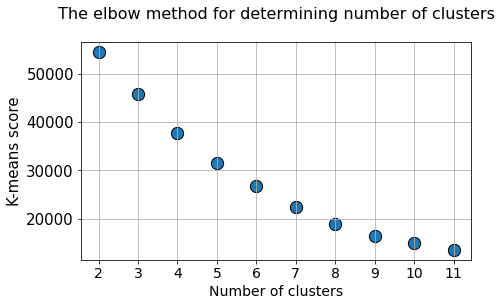

In [47]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

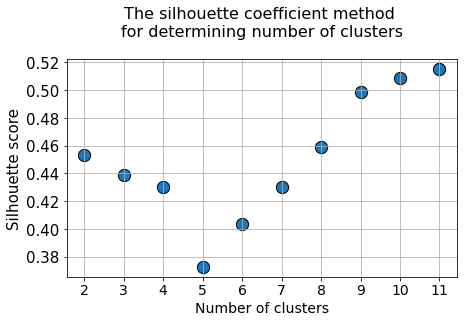

In [48]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

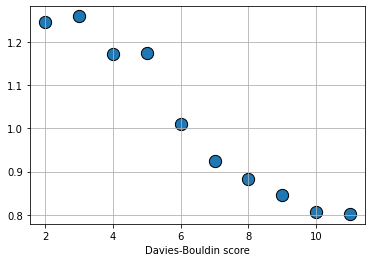

In [49]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

Основываясь на графиках, я бы сказал, что оптимальным количеством кластеров для датасэта с мемами будет 2-3.

### Кластеризация user_df

In [50]:
X2=user.copy()


In [57]:
X2_scaled=scaler.fit_transform(X2)

In [58]:
# Повторяем для пользователей
km_scores2= []
km_silhouette2 = []
db_score2 = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X2_scaled)
    preds = km.predict(X2_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X2_scaled)))
    km_scores2.append(-km.score(X2_scaled))
    
    silhouette = silhouette_score(X2_scaled,preds)
    km_silhouette2.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X2_scaled,preds)
    db_score2.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

Score for number of cluster(s) 2: -178.41730670035446
Silhouette score for number of cluster(s) 2: 0.9072211878479516
Davies Bouldin score for number of cluster(s) 2: 0.15953897927903168
Score for number of cluster(s) 3: -65.56603312106492
Silhouette score for number of cluster(s) 3: 0.9273706845351748
Davies Bouldin score for number of cluster(s) 3: 0.09516048531809464
Score for number of cluster(s) 4: -47.54791556903776
Silhouette score for number of cluster(s) 4: 0.8969068814093958
Davies Bouldin score for number of cluster(s) 4: 0.5719738853134028
Score for number of cluster(s) 5: -36.34565271110847
Silhouette score for number of cluster(s) 5: 0.893395073215103
Davies Bouldin score for number of cluster(s) 5: 0.515767674969871
Score for number of cluster(s) 6: -28.768374672042455
Silhouette score for number of cluster(s) 6: 0.705361756341275
Davies Bouldin score for number of cluster(s) 6: 0.5754698066014091
Score for number of cluster(s) 7: -23.795820560949068
Silhouette score for

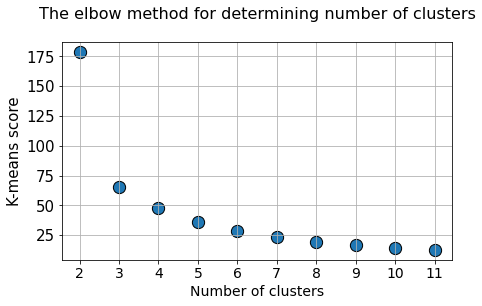

In [59]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores2,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

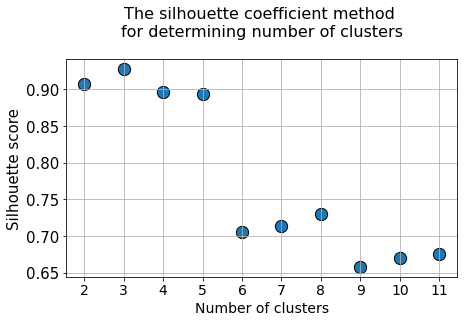

In [60]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette2,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

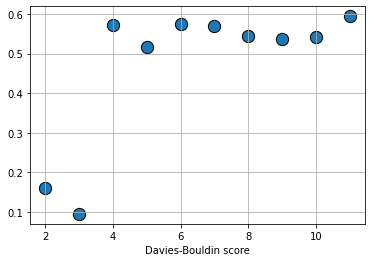

In [61]:
plt.scatter(x=[i for i in range(2,12)],y=db_score2,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

Тут четко видно, что 3 кластера является оптимальным количеством для датасэта с пользователями. Дальше оценка либо не улучшается, либо ухудшается.

In [62]:
meme_preds = KMeans(n_clusters = 3, random_state=0).fit_predict(X_scaled)
user_preds = KMeans(n_clusters = 2, random_state=0).fit_predict(X2_scaled)

### Добавление кластеров

In [71]:
meme['clusters'] = meme_preds
user['clusters'] = user_preds

In [72]:
meme.head()

,published_at2021,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped,clusters
meme_id,,,,,,,,,,,,,
13395,0,0,1,28,38,10.0,1,2.0,0,1,0,0,0
13952,0,1,1,9,16,80.0,1,3.0,0,1,0,2,0
15593,0,0,1,41,54,19.0,1,2.0,0,1,0,1,0
18442,0,1,1,87,48,78.0,1,3.0,0,1,0,2,0
20798,0,0,1,234,178,9.0,1,2.0,0,1,0,0,0


In [73]:
user.head()

,sessions,last_session_memes,watched_memes,interface_lang,clusters
user_id,,,,,
1235209430,3,4,8,1,1
113584040,1,1,0,0,0
1142713343,1,1,0,1,1
187967374,2,5,9,0,0
923016092,39,1,35,1,1


## Объединение датасэтов

In [88]:
event_meme = pd.merge(event, meme, on = 'meme_id')
event_meme_user = pd.merge(event_meme, user, on = 'user_id')
event_meme_user.rename(columns={'clusters_x' : 'clusters_meme', 'clusters_y' : 'clusters_user'})

,event_id,reaction_id,meme_id,user_id,published_at2021,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped,clusters_x,sessions,last_session_memes,watched_memes,interface_lang,clusters_y
0,1569409,1.0,9197,1153946021,0,0,1,554,600,46.0,1,2.0,0,1,0,0,0,39,1,636,0,0
1,1563971,1.0,46731,1153946021,0,0,1,1660,1154,8.0,1,2.0,0,1,0,0,0,39,1,636,0,0
2,1564013,1.0,49571,1153946021,0,0,1,839,381,21.0,1,2.0,0,1,0,0,0,39,1,636,0,0
3,1569414,1.0,53977,1153946021,0,0,1,564,260,21.0,1,2.0,0,1,0,0,0,39,1,636,0,0
4,1569391,1.0,58789,1153946021,0,0,1,466,212,21.0,1,2.0,0,1,0,0,0,39,1,636,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741065,9140450,2.0,89872,1350802492,1,2,1,10,15,117.0,0,2.0,0,1,0,1,2,1,8,7,0,0
9741066,9150545,1.0,89776,566881811,1,2,1,291,140,82.0,0,2.0,0,1,0,1,2,1,1,0,0,0
9741067,9207987,1.0,90201,30495324,1,2,1,55,42,9.0,0,2.0,0,1,0,0,2,1,3,2,0,0
9741068,9207969,2.0,90174,30495324,1,2,1,221,107,82.0,0,2.0,0,1,0,1,2,1,3,2,0,0


In [91]:
event_meme_user.rename(columns={'clusters_x' : 'clusters_meme', 'clusters_y' : 'clusters_user'}, inplace = True)

In [92]:
event_meme_user.head()

,event_id,reaction_id,meme_id,user_id,published_at2021,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped,clusters_meme,sessions,last_session_memes,watched_memes,interface_lang,clusters_user
0,1569409,1.0,9197,1153946021,0,0,1,554,600,46.0,1,2.0,0,1,0,0,0,39,1,636,0,0
1,1563971,1.0,46731,1153946021,0,0,1,1660,1154,8.0,1,2.0,0,1,0,0,0,39,1,636,0,0
2,1564013,1.0,49571,1153946021,0,0,1,839,381,21.0,1,2.0,0,1,0,0,0,39,1,636,0,0
3,1569414,1.0,53977,1153946021,0,0,1,564,260,21.0,1,2.0,0,1,0,0,0,39,1,636,0,0
4,1569391,1.0,58789,1153946021,0,0,1,466,212,21.0,1,2.0,0,1,0,0,0,39,1,636,0,0
